In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data4project.csv')

In [3]:
df = df.drop(columns = 'sqft')

In [4]:
df.dtypes

bedrooms          float64
days_on_market    float64
fireplace         float64
price_sold        float64
year              float64
yearbuilt         float64
zipcode           float64
baths             float64
lotsize            object
pool               object
style              object
type               object
heattype           object
basement           object
latitude          float64
longitude         float64
school_dist       float64
dtype: object

In [5]:
df.describe()

,bedrooms,days_on_market,fireplace,price_sold,year,yearbuilt,zipcode,baths,latitude,longitude,school_dist
count,16810.000000,21480.000000,16878.000000,2.148000e+04,21480.000000,21480.000000,21480.000000,16810.000000,17484.000000,17484.000000,12405.000000
mean,3.642296,81.646395,3.476715,1.823485e+05,2006.177933,2023.001629,30028.378631,2.276026,43.956974,-74.017289,32.701330
std,0.838501,78.612488,44.228281,7.666158e+04,1.607022,473.606037,693.713764,0.607587,0.039836,0.054219,21.276486
min,0.000000,0.000000,0.000000,2.100000e+04,2004.000000,1885.000000,0.000000,0.000000,43.842728,-74.199623,1.000000
25%,3.000000,28.000000,1.000000,1.400000e+05,2005.000000,1988.000000,30043.000000,2.000000,43.927250,-74.059363,12.000000
50%,4.000000,61.000000,1.000000,1.660000e+05,2006.000000,1996.000000,30044.000000,2.000000,43.947142,-74.021484,32.000000
75%,4.000000,108.000000,1.000000,2.050000e+05,2007.000000,2003.000000,30045.000000,2.000000,43.988015,-73.972563,52.000000
max,10.000000,1035.000000,1745.000000,2.234825e+06,2009.000000,9999.000000,40043.000000,6.000000,44.116165,-73.853828,72.000000


In [6]:
correlations = df.corr()
correlations

,bedrooms,days_on_market,fireplace,price_sold,year,yearbuilt,zipcode,baths,latitude,longitude,school_dist
bedrooms,1.000000,0.020547,0.199659,0.541668,-0.004915,-0.008180,-0.006649,0.640243,0.058562,0.192768,0.110793
days_on_market,0.020547,1.000000,-0.023566,0.116844,0.072862,-0.000360,0.009938,0.053073,-0.013643,0.055138,-0.006678
fireplace,0.199659,-0.023566,1.000000,0.024452,-0.017023,-0.004896,0.001591,0.255842,-0.017917,-0.021216,0.024165
price_sold,0.541668,0.116844,0.024452,1.000000,-0.133926,0.017482,-0.000849,0.580634,0.114445,0.168025,0.075472
year,-0.004915,0.072862,-0.017023,-0.133926,1.000000,-0.022033,-0.013289,0.021940,-0.010824,0.026170,-0.025834
yearbuilt,-0.008180,-0.000360,-0.004896,0.017482,-0.022033,1.000000,0.001302,-0.008799,0.009140,0.008349,-0.011894
zipcode,-0.006649,0.009938,0.001591,-0.000849,-0.013289,0.001302,1.000000,-0.006507,0.006727,0.000744,-0.000482
baths,0.640243,0.053073,0.255842,0.580634,0.021940,-0.008799,-0.006507,1.000000,0.028498,0.111819,0.077697
latitude,0.058562,-0.013643,-0.017917,0.114445,-0.010824,0.009140,0.006727,0.028498,1.000000,0.214437,0.243227
longitude,0.192768,0.055138,-0.021216,0.168025,0.026170,0.008349,0.000744,0.111819,0.214437,1.000000,0.365009


Text(0.5, 1.05, 'Overall Correlation Matrix')

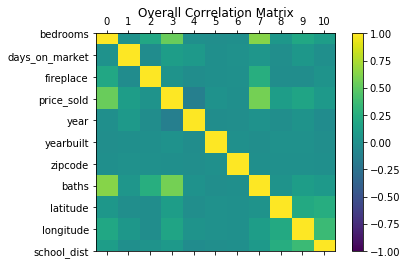

In [7]:
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(correlations, vmin=-1, vmax = 1)
fig.colorbar(cax)
ticks=np.arange(0, 11,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_yticklabels(correlations.columns)
ax.set_title('Overall Correlation Matrix')

In [39]:
#We will now focus on properties with less than 3 bedrooms
two_bedrooms = df[df['bedrooms'] < 3]
two_bedrooms
two_bedrooms

,bedrooms,days_on_market,fireplace,price_sold,year,yearbuilt,zipcode,baths,lotsize,pool,style,type,heattype,basement,latitude,longitude,school_dist,real_price_sold
23,2.0,43.0,0.0,119500.0,2004.0,1989.0,30044.0,2.0,NaN,NaN,Townh,Condo,"CNTRL,GAS__","BATH_,DAYLT,FINSH,FULL_,INTER",43.940681,-74.104630,NaN,118316.831683
40,2.0,162.0,1.0,110500.0,2004.0,1997.0,30044.0,2.0,NaN,NaN,Townh,Condo,GAS__,"DAYLT,EXTEN,FULL_,INTER",NaN,NaN,35.0,109405.940594
121,2.0,199.0,1.0,149470.0,2004.0,2003.0,30044.0,2.0,NaN,NaN,Townh,Condo,"HPUMP,ZONED",SLABN,NaN,NaN,10.0,147990.099010
190,2.0,55.0,1.0,109900.0,2004.0,1989.0,30044.0,2.0,NaN,NaN,Townh,Condo,"FORCE,GAS__",SLABN,43.941433,-74.106262,NaN,108811.881188
273,2.0,153.0,0.0,72000.0,2004.0,1974.0,30045.0,2.0,NaN,NaN,Townh,Condo,"FORCE,GAS__",CRAWL,43.947807,-73.980789,60.0,71287.128713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21419,2.0,18.0,0.0,47000.0,2009.0,1987.0,30044.0,2.0,N/R,NaN,Townhouse,Built As Townhouse,"Force,Gas__",Slab/None,43.941093,-74.104431,35.0,1.300000
21459,2.0,15.0,1.0,79900.0,2009.0,2006.0,30044.0,2.0,N/R,NaN,Townhouse,Built As Townhouse,"Force,Gas__",Slab/None,43.951817,-74.052238,3.0,1.300000
21471,2.0,116.0,1.0,50000.0,2009.0,1987.0,30044.0,2.0,N/R,NaN,Townhouse,Built As Condominium,Forced Air,"Daylt,Exten,Full_,Inter",NaN,NaN,35.0,1.300000
21472,0.0,63.0,0.0,60000.0,2009.0,2009.0,30045.0,0.0,Under 1/3 Acre,None,Traditional,NaN,Other,Slab/None,NaN,NaN,51.0,1.300000


In [9]:
correlations_two_bedrooms = two_bedrooms.corr()
correlations_two_bedrooms

,bedrooms,days_on_market,fireplace,price_sold,year,yearbuilt,zipcode,baths,latitude,longitude,school_dist
bedrooms,1.000000,0.026388,0.509263,0.105352,-0.311291,0.023500,-0.021994,0.834803,0.119025,-0.177117,-0.195334
days_on_market,0.026388,1.000000,0.055143,0.041213,0.004366,0.030214,-0.019044,0.046399,0.086412,-0.013293,0.040386
fireplace,0.509263,0.055143,1.000000,0.212356,-0.175575,0.035285,-0.097134,0.530789,0.178400,-0.251517,-0.147634
price_sold,0.105352,0.041213,0.212356,1.000000,-0.273563,-0.006037,-0.069929,0.192945,0.273997,0.080727,-0.129406
year,-0.311291,0.004366,-0.175575,-0.273563,1.000000,-0.004191,0.003481,-0.270552,-0.018184,0.109214,0.058370
yearbuilt,0.023500,0.030214,0.035285,-0.006037,-0.004191,1.000000,0.003365,-0.016323,-0.033916,-0.004836,-0.296839
zipcode,-0.021994,-0.019044,-0.097134,-0.069929,0.003481,0.003365,1.000000,-0.029591,-0.154626,0.079407,-0.051771
baths,0.834803,0.046399,0.530789,0.192945,-0.270552,-0.016323,-0.029591,1.000000,0.092779,-0.229251,-0.220245
latitude,0.119025,0.086412,0.178400,0.273997,-0.018184,-0.033916,-0.154626,0.092779,1.000000,0.396277,0.358106
longitude,-0.177117,-0.013293,-0.251517,0.080727,0.109214,-0.004836,0.079407,-0.229251,0.396277,1.000000,0.209097


Text(0.5, 1.05, '2-Bedroom Correlation Matrix')

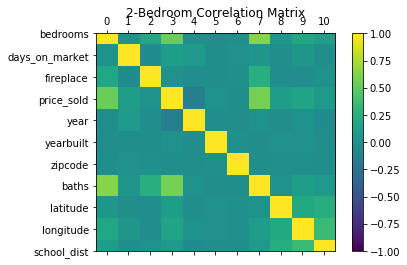

In [10]:
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(correlations, vmin=-1, vmax = 1)
fig.colorbar(cax)
ticks=np.arange(0, 11,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_yticklabels(correlations.columns)
ax.set_title('2-Bedroom Correlation Matrix')

Text(0.5, 1.0, 'Density Functions Per Variable')

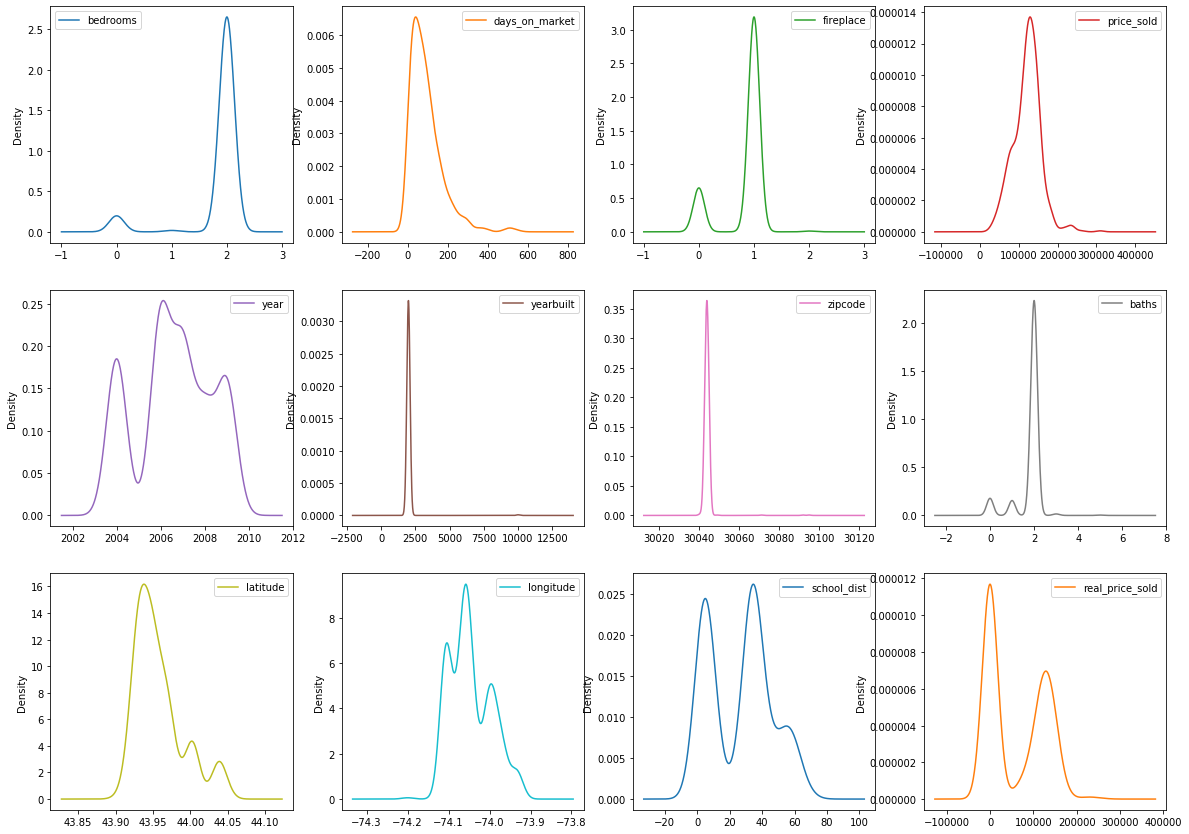

In [44]:
two_bedrooms.plot(kind='density', subplots=True, layout=(4,4), sharex=False, figsize=(20,20))
plt.title('Density Functions Per Variable')

Text(0.5, 1.0, 'Price Sold per Days-on-Market, Segmented by School District')

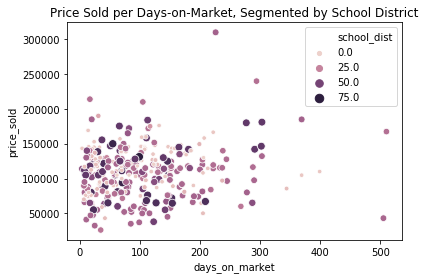

In [47]:
sns.scatterplot(x=two_bedrooms['days_on_market'], y=two_bedrooms['price_sold'], hue = two_bedrooms['school_dist'], size = two_bedrooms['school_dist'])
plt.title('Price Sold per Days-on-Market, Segmented by School District')

Text(0.5, 1.0, 'Variable Distribution')

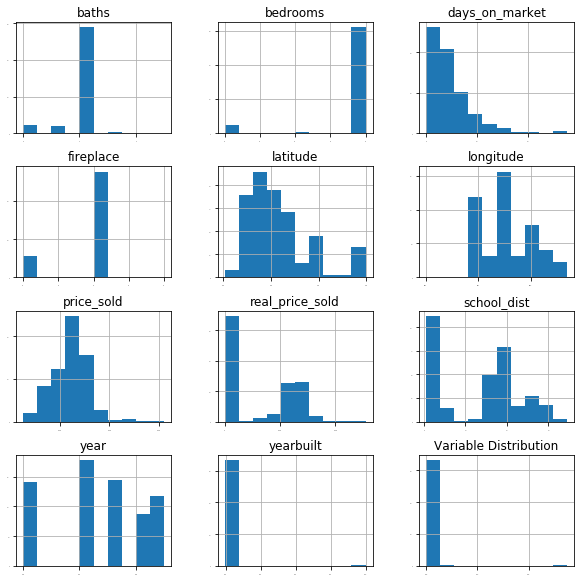

In [49]:
two_bedrooms.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(10,10))
plt.title('Variable Distribution')

In [14]:
two_bedrooms.describe()

,bedrooms,days_on_market,fireplace,price_sold,year,yearbuilt,zipcode,baths,latitude,longitude,school_dist
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,479.000000,479.000000,322.000000
mean,1.856287,93.254491,0.833832,121317.232036,2006.576347,2020.616766,30044.172156,1.812874,43.958247,-74.046081,26.565217
std,0.511053,81.981772,0.380474,34983.325647,1.683818,437.705428,2.997551,0.565910,0.032515,0.050168,19.106614
min,0.000000,1.000000,0.000000,26000.000000,2004.000000,1947.000000,30040.000000,0.000000,43.901428,-74.199623,1.000000
25%,2.000000,35.000000,1.000000,99975.000000,2006.000000,1989.000000,30044.000000,2.000000,43.932608,-74.090695,5.000000
50%,2.000000,74.000000,1.000000,125000.000000,2007.000000,2002.000000,30044.000000,2.000000,43.950493,-74.056534,33.000000
75%,2.000000,125.000000,1.000000,142895.500000,2008.000000,2004.000000,30044.000000,2.000000,43.970106,-74.002449,37.000000
max,2.000000,552.000000,2.000000,310000.000000,2009.000000,9999.000000,30095.000000,5.000000,44.049000,-73.930473,69.000000


Text(0.5, 1.0, 'Price Distribution - (units with less than 3 bedrooms)')

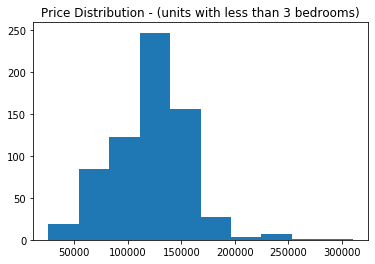

In [50]:
plt.hist(two_bedrooms['price_sold'])
plt.title('Price Distribution - (units with less than 3 bedrooms)')

Text(0.5, 1.0, 'Days-on-Market Distributon - (units with less than 3 bedrooms)')

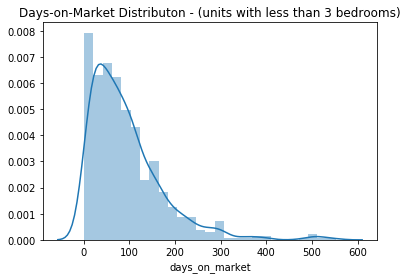

In [51]:
sns.distplot(two_bedrooms['days_on_market'])
plt.title('Days-on-Market Distributon - (units with less than 3 bedrooms)')

In [17]:
per_zipcode = two_bedrooms.groupby('zipcode').mean().reset_index()
per_zipcode = per_zipcode.sort_values('price_sold', ascending = True)
per_zipcode

,zipcode,bedrooms,days_on_market,fireplace,price_sold,year,yearbuilt,baths,latitude,longitude,school_dist
5,30046.0,2.000000,29.000000,2.000000,55000.000000,2009.000000,1950.000000,1.000000,NaN,NaN,37.000000
7,30071.0,2.000000,79.000000,1.000000,92000.000000,2006.000000,1985.000000,2.000000,43.934280,-74.199623,NaN
4,30045.0,1.642384,93.046358,0.596026,112684.450331,2006.913907,2043.072848,1.509934,43.952578,-73.982617,36.904110
8,30092.0,2.000000,106.000000,1.000000,115200.000000,2006.000000,1984.000000,2.000000,NaN,NaN,NaN
3,30044.0,1.923295,90.666761,0.906250,118389.798295,2006.460227,2021.000000,1.917614,43.938632,-74.079491,16.609195
9,30095.0,2.000000,53.000000,0.000000,122300.000000,2006.000000,2001.000000,2.000000,43.965691,-73.966965,NaN
1,30041.0,2.000000,104.000000,1.000000,129333.333333,2005.333333,1997.666667,2.000000,43.982816,-74.076268,35.000000
2,30043.0,1.903846,99.955128,0.891026,136494.839744,2006.544872,1999.769231,1.865385,44.006045,-74.030815,39.763889
6,30049.0,2.000000,81.000000,1.000000,142655.000000,2007.000000,1997.000000,2.000000,43.931515,-74.104652,NaN
0,30040.0,2.000000,76.300003,1.000000,143000.000000,2004.000000,2002.000000,2.000000,43.927116,-74.113182,35.000000


Text(0.5, 1.0, 'Average Price per Zipcode')

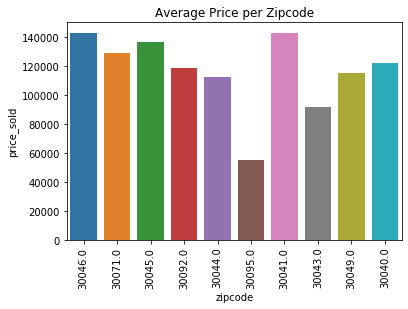

In [18]:
fig, ax = plt.subplots()
sns.barplot(x = 'zipcode', y = 'price_sold', data = per_zipcode, capsize = 0.2, ci = 'sk')
ax.set_xticklabels(per_zipcode['zipcode'], rotation=90)
ax.set_title('Average Price per Zipcode')

Price per year per rooms and then adjust it to inflation

In [23]:
per_room = per_yr_room['price_sold']
per_room = per_room.unstack()
per_room.head()

bedrooms,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,10.0
year,,,,,,,,,,
2004.0,109000.000000,NaN,124709.765957,147773.635630,193659.525641,270764.467890,304078.062500,287200.000000,NaN,NaN
2006.0,109500.000000,117500.0,132008.691429,159127.239119,208873.095342,277690.512727,335491.235294,365166.666667,346500.0,NaN
2007.0,187900.000000,97500.0,131513.524823,158335.328358,206095.624409,281482.712695,381944.466667,295321.000000,348500.0,278100.0
2008.0,119933.333333,NaN,120875.053333,137786.866346,186964.757409,248470.317460,272237.066667,378450.000000,410000.0,NaN
2009.0,101112.096774,NaN,85293.046512,106995.115044,153557.010718,215221.867470,239158.244898,177875.000000,394900.0,NaN


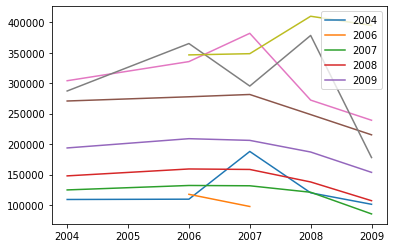

In [58]:
fig, ax1 = plt.subplots()
plt.plot(per_room)
plt.legend(('2004', '2006', '2007', '2008', '2009'))

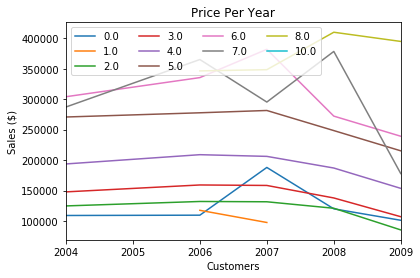

In [25]:
my_plot = per_room.plot(kind='line', stacked=False, title="Price Per Year")
my_plot.set_xlabel("Customers")
my_plot.set_ylabel("Sales ($)")
my_plot.legend(loc='best', ncol=4)

In [26]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [27]:
X = df[['bedrooms', 'days_on_market', 'yearbuilt', 'baths', 'school_dist']]
y = df[['price_sold']]

In [28]:
X.isna().sum()
X1 = X.dropna()
X1.isna().sum()

bedrooms          0
days_on_market    0
yearbuilt         0
baths             0
school_dist       0
dtype: int64

In [29]:
testdropna = df.dropna()
X2 = testdropna[['bedrooms', 'days_on_market', 'yearbuilt', 'baths']]
y2 = testdropna[['price_sold']]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

Text(0, 0.5, 'Coefficients')

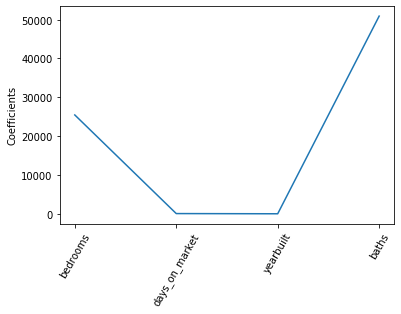

In [31]:
lasso = Lasso(alpha=0.1, normalize = True)
names = X2.columns
lasso_coef = lasso.fit(X2, y2).coef_
plt.plot(range(len(names)), lasso_coef)
plt.xticks(range(len(names)), names, rotation = 60)
plt.ylabel('Coefficients')

In [32]:
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

0.42393006302655556

In [33]:
#Issues with this model should include lack of property size and a one-fits all approach to creating the regression
#Next steps should include narrowing down the properties into smaller data sets filtering by bedroom and/or bath ranges
#Below we'll fit the data to different statistical models to estimate property value

In [34]:
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [35]:
model_1 = Lasso()
model_2 = Ridge()
model_3 = DecisionTreeRegressor()
model_4 = RandomForestRegressor(random_state=0)

models = [model_1, model_2, model_3, model_4]

In [36]:
def score_model(model, X_t = X_train, X_v = X_test, y_t = y_train, y_v = y_test):
    model.fit(X_t, y_t)
    preds = model.predict(X_v)
    return mean_absolute_error(y_test, preds)

for i in range(0, len(models)):
    mae = score_model(models[i])
    print('Model %d MAE: %d' % (i+1, mae))

Model 1 MAE: 34139
Model 2 MAE: 34136
Model 3 MAE: 43255
Model 4 MAE: 36279


C:\Users\14168\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\14168\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


C:\Users\14168\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


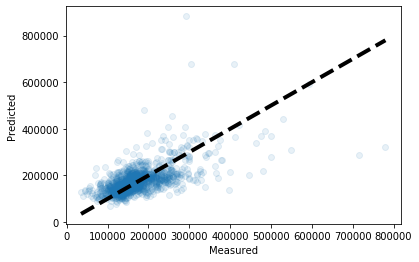

In [37]:
from sklearn.model_selection import cross_val_predict

model_4.fit(X_train, y_train)
predictions = model_4.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, predictions, alpha = 0.1)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [38]:
model_2.fit(X_train, y_train)
predictions = model_2.predict(X_test)
coefficients = pd.DataFrame(model_2.coef_)
labels = pd.DataFrame(X_train.columns)
coeff_list = coefficients.transpose(copy=True)
pd.concat([labels, coeff_list], axis=1)

,0,0
0,bedrooms,25256.595081
1,days_on_market,54.674018
2,yearbuilt,0.942079
3,baths,51746.106342
